[과제] 산탄데르 고객 만족 데이터 세트에 대해서 고객 만족 여부를 xgboost와 lightgbm을 활용해 예측을

In [19]:
!pip install xgboost

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib
cust_df = pd.read_csv('./dataset/santander/train_santander.csv')
cust_df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [57]:
cust_df.isnull().sum().sum()

0

In [58]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [59]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [60]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [61]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

In [62]:
X = cust_df.iloc[:, :-1]
y = cust_df.iloc[:, -1]

In [63]:
y.unique()

array([0, 1], dtype=int64)

In [64]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=156)

xgb_clf = XGBClassifier(
    n_estimators=500, random_state=156, tree_method='gpu_hist')
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric='auc', eval_set=[(X_train, y_train)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(
    X_test)[:, 1], average='macro')  # macro ->precision 값을 모두 더한 다음 열의 갯수로 나눈 것
print(xgb_roc_score)

C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82722
[1]	validation_0-auc:0.83436
[2]	validation_0-auc:0.83935
[3]	validation_0-auc:0.84544
[4]	validation_0-auc:0.84831
[5]	validation_0-auc:0.85168
[6]	validation_0-auc:0.85592
[7]	validation_0-auc:0.85948
[8]	validation_0-auc:0.86129
[9]	validation_0-auc:0.86375
[10]	validation_0-auc:0.86743
[11]	validation_0-auc:0.87017
[12]	validation_0-auc:0.87366
[13]	validation_0-auc:0.87587
[14]	validation_0-auc:0.87810
[15]	validation_0-auc:0.87965
[16]	validation_0-auc:0.88184
[17]	validation_0-auc:0.88399
[18]	validation_0-auc:0.88516
[19]	validation_0-auc:0.88684
[20]	validation_0-auc:0.88939
[21]	validation_0-auc:0.89001
[22]	validation_0-auc:0.89047
[23]	validation_0-auc:0.89227
[24]	validation_0-auc:0.89255
[25]	validation_0-auc:0.89304
[26]	validation_0-auc:0.89343
[27]	validation_0-auc:0.89499
[28]	validation_0-auc:0.89704
[29]	validation_0-auc:0.89776
[30]	validation_0-auc:0.89925
[31]	validation_0-auc:0.89985
[32]	validation_0-auc:0.90019
[33]	validation_0-au

[268]	validation_0-auc:0.96475
[269]	validation_0-auc:0.96478
[270]	validation_0-auc:0.96484
[271]	validation_0-auc:0.96484
[272]	validation_0-auc:0.96514
[273]	validation_0-auc:0.96536
[274]	validation_0-auc:0.96538
[275]	validation_0-auc:0.96538
[276]	validation_0-auc:0.96543
[277]	validation_0-auc:0.96547
[278]	validation_0-auc:0.96551
[279]	validation_0-auc:0.96556
[280]	validation_0-auc:0.96559
[281]	validation_0-auc:0.96560
[282]	validation_0-auc:0.96560
[283]	validation_0-auc:0.96562
[284]	validation_0-auc:0.96563
[285]	validation_0-auc:0.96609
[286]	validation_0-auc:0.96625
[287]	validation_0-auc:0.96637
[288]	validation_0-auc:0.96645
[289]	validation_0-auc:0.96650
[290]	validation_0-auc:0.96653
[291]	validation_0-auc:0.96654
[292]	validation_0-auc:0.96653
[293]	validation_0-auc:0.96672
[294]	validation_0-auc:0.96678
[295]	validation_0-auc:0.96682
[296]	validation_0-auc:0.96684
[297]	validation_0-auc:0.96685
[298]	validation_0-auc:0.96695
[299]	validation_0-auc:0.96726
[300]	va

In [30]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(
    random_state=156, tree_method='gpu_hist', n_estimators=100)
params = {'max_depth': [5, 7], 'min_child_weight': [
    1, 3], 'colsample_bytree': [0.5, 0.75]}
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3, n_jobs=-1)
gridcv.fit(X_train, y_train, early_stopping_rounds=30,
           eval_metric='auc', eval_set=[(X_train, y_train)])

print('gridcv 최적파라미터:', gridcv.best_params_)
roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[
                          :, 1], average='macro')
print(roc_score)

C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81942	validation_1-auc:0.80651
[1]	validation_0-auc:0.83372	validation_1-auc:0.82019
[2]	validation_0-auc:0.83701	validation_1-auc:0.82164
[3]	validation_0-auc:0.84615	validation_1-auc:0.82844
[4]	validation_0-auc:0.85012	validation_1-auc:0.82878
[5]	validation_0-auc:0.85210	validation_1-auc:0.82656
[6]	validation_0-auc:0.85830	validation_1-auc:0.83080
[7]	validation_0-auc:0.86460	validation_1-auc:0.83676
[8]	validation_0-auc:0.86751	validation_1-auc:0.83696
[9]	validation_0-auc:0.87102	validation_1-auc:0.83857
[10]	validation_0-auc:0.87380	validation_1-auc:0.83779
[11]	validation_0-auc:0.87672	validation_1-auc:0.83878
[12]	validation_0-auc:0.87960	validation_1-auc:0.84027
[13]	validation_0-auc:0.88100	validation_1-auc:0.83901
[14]	validation_0-auc:0.88374	validation_1-auc:0.83839
[15]	validation_0-auc:0.88557	validation_1-auc:0.83731
[16]	validation_0-auc:0.88783	validation_1-auc:0.83721
[17]	validation_0-auc:0.89053	validation_1-auc:0.83723
[18]	validation_0-au

In [65]:
xgb_clf = XGBClassifier(random_state=156, tree_method='gpu_hist', n_estimators=1000, max_depth=7,
                        min_child_weight=3, colsample_bytree=0.5, learning_rate=0.02, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
            eval_metric='auc', eval_set=[(X_train, y_train)])
roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[
                          :, 1], average='macro')
print(roc_score)

C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73276
[1]	validation_0-auc:0.75878
[2]	validation_0-auc:0.81888
[3]	validation_0-auc:0.82523
[4]	validation_0-auc:0.82860
[5]	validation_0-auc:0.83339
[6]	validation_0-auc:0.83187
[7]	validation_0-auc:0.83346
[8]	validation_0-auc:0.83349
[9]	validation_0-auc:0.83436
[10]	validation_0-auc:0.83623
[11]	validation_0-auc:0.83720
[12]	validation_0-auc:0.83809
[13]	validation_0-auc:0.83942
[14]	validation_0-auc:0.83855
[15]	validation_0-auc:0.83867
[16]	validation_0-auc:0.83995
[17]	validation_0-auc:0.84003
[18]	validation_0-auc:0.83979
[19]	validation_0-auc:0.83909
[20]	validation_0-auc:0.83910
[21]	validation_0-auc:0.84132
[22]	validation_0-auc:0.84195
[23]	validation_0-auc:0.84214
[24]	validation_0-auc:0.84280
[25]	validation_0-auc:0.84339
[26]	validation_0-auc:0.84281
[27]	validation_0-auc:0.84240
[28]	validation_0-auc:0.84304
[29]	validation_0-auc:0.84339
[30]	validation_0-auc:0.84453
[31]	validation_0-auc:0.84460
[32]	validation_0-auc:0.84429
[33]	validation_0-au

[268]	validation_0-auc:0.89084
[269]	validation_0-auc:0.89097
[270]	validation_0-auc:0.89116
[271]	validation_0-auc:0.89131
[272]	validation_0-auc:0.89146
[273]	validation_0-auc:0.89161
[274]	validation_0-auc:0.89172
[275]	validation_0-auc:0.89186
[276]	validation_0-auc:0.89192
[277]	validation_0-auc:0.89201
[278]	validation_0-auc:0.89206
[279]	validation_0-auc:0.89219
[280]	validation_0-auc:0.89230
[281]	validation_0-auc:0.89242
[282]	validation_0-auc:0.89256
[283]	validation_0-auc:0.89263
[284]	validation_0-auc:0.89276
[285]	validation_0-auc:0.89279
[286]	validation_0-auc:0.89295
[287]	validation_0-auc:0.89306
[288]	validation_0-auc:0.89316
[289]	validation_0-auc:0.89319
[290]	validation_0-auc:0.89323
[291]	validation_0-auc:0.89328
[292]	validation_0-auc:0.89344
[293]	validation_0-auc:0.89357
[294]	validation_0-auc:0.89360
[295]	validation_0-auc:0.89372
[296]	validation_0-auc:0.89389
[297]	validation_0-auc:0.89392
[298]	validation_0-auc:0.89402
[299]	validation_0-auc:0.89418
[300]	va

[533]	validation_0-auc:0.90583
[534]	validation_0-auc:0.90586
[535]	validation_0-auc:0.90588
[536]	validation_0-auc:0.90590
[537]	validation_0-auc:0.90597
[538]	validation_0-auc:0.90598
[539]	validation_0-auc:0.90604
[540]	validation_0-auc:0.90611
[541]	validation_0-auc:0.90621
[542]	validation_0-auc:0.90624
[543]	validation_0-auc:0.90627
[544]	validation_0-auc:0.90635
[545]	validation_0-auc:0.90637
[546]	validation_0-auc:0.90641
[547]	validation_0-auc:0.90643
[548]	validation_0-auc:0.90646
[549]	validation_0-auc:0.90648
[550]	validation_0-auc:0.90655
[551]	validation_0-auc:0.90656
[552]	validation_0-auc:0.90659
[553]	validation_0-auc:0.90666
[554]	validation_0-auc:0.90669
[555]	validation_0-auc:0.90680
[556]	validation_0-auc:0.90684
[557]	validation_0-auc:0.90688
[558]	validation_0-auc:0.90690
[559]	validation_0-auc:0.90693
[560]	validation_0-auc:0.90696
[561]	validation_0-auc:0.90698
[562]	validation_0-auc:0.90713
[563]	validation_0-auc:0.90717
[564]	validation_0-auc:0.90721
[565]	va

[798]	validation_0-auc:0.91536
[799]	validation_0-auc:0.91538
[800]	validation_0-auc:0.91544
[801]	validation_0-auc:0.91550
[802]	validation_0-auc:0.91554
[803]	validation_0-auc:0.91555
[804]	validation_0-auc:0.91556
[805]	validation_0-auc:0.91557
[806]	validation_0-auc:0.91558
[807]	validation_0-auc:0.91564
[808]	validation_0-auc:0.91564
[809]	validation_0-auc:0.91570
[810]	validation_0-auc:0.91578
[811]	validation_0-auc:0.91585
[812]	validation_0-auc:0.91586
[813]	validation_0-auc:0.91587
[814]	validation_0-auc:0.91592
[815]	validation_0-auc:0.91593
[816]	validation_0-auc:0.91600
[817]	validation_0-auc:0.91602
[818]	validation_0-auc:0.91605
[819]	validation_0-auc:0.91607
[820]	validation_0-auc:0.91613
[821]	validation_0-auc:0.91614
[822]	validation_0-auc:0.91614
[823]	validation_0-auc:0.91615
[824]	validation_0-auc:0.91615
[825]	validation_0-auc:0.91616
[826]	validation_0-auc:0.91617
[827]	validation_0-auc:0.91617
[828]	validation_0-auc:0.91618
[829]	validation_0-auc:0.91621
[830]	va

ValueError: Number of features of the model must match the input. Model n_features_ is 370 and input n_features is 369

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

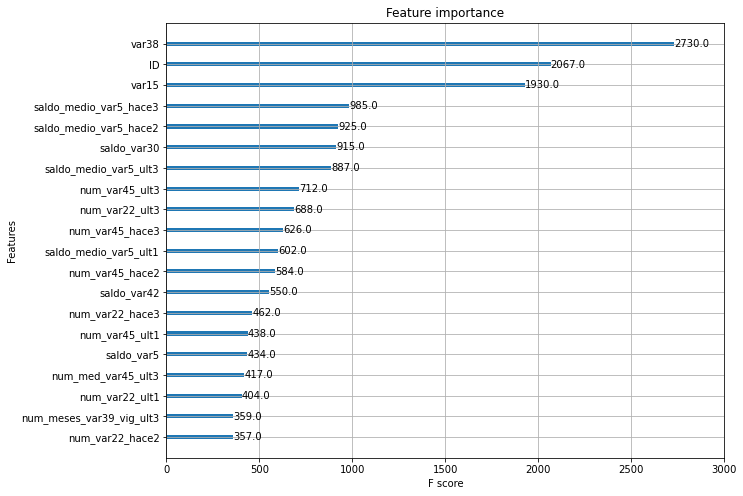

In [35]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20)

In [36]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

lgbm_clf = LGBMClassifier(n_estimators=500)
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100,
             eval_metric='auc', eval_set=[(X_train, y_train)], verbose=1)
lgbm_roc_score = roc_auc_score(
    y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print(lgbm_roc_score)

C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.824666	training's binary_logloss: 0.157094	valid_1's auc: 0.812769	valid_1's binary_logloss: 0.16076
[2]	training's auc: 0.830909	training's binary_logloss: 0.151631	valid_1's auc: 0.813941	valid_1's binary_logloss: 0.156243
[3]	training's auc: 0.837552	training's binary_logloss: 0.147481	valid_1's auc: 0.820019	valid_1's binary_logloss: 0.152884
[4]	training's auc: 0.841626	training's binary_logloss: 0.14436	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.15033
[5]	training's auc: 0.845426	training's binary_logloss: 0.141747	valid_1's auc: 0.823269	valid_1's binary_logloss: 0.148245
[6]	training's auc: 0.848682	training's binary_logloss: 0.139614	valid_1's auc: 0.826267	valid_1's binary_logloss: 0.146592
[7]	training's auc: 0.851897	training's binary_logloss: 0.137746	valid_1's auc: 0.82746	valid_1's binary_logloss: 0.145222
[8]	training's auc: 0.853416	training's binary_logloss: 0.136197	valid_1's auc: 0.827743	valid_1's binary_logloss: 0.144139
[9]	training

[72]	training's auc: 0.917019	training's binary_logloss: 0.109886	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.137592
[73]	training's auc: 0.917528	training's binary_logloss: 0.109687	valid_1's auc: 0.835629	valid_1's binary_logloss: 0.137569
[74]	training's auc: 0.917762	training's binary_logloss: 0.109541	valid_1's auc: 0.835457	valid_1's binary_logloss: 0.137602
[75]	training's auc: 0.918459	training's binary_logloss: 0.109284	valid_1's auc: 0.835109	valid_1's binary_logloss: 0.137687
[76]	training's auc: 0.918764	training's binary_logloss: 0.109112	valid_1's auc: 0.834856	valid_1's binary_logloss: 0.137713
[77]	training's auc: 0.919403	training's binary_logloss: 0.108854	valid_1's auc: 0.834991	valid_1's binary_logloss: 0.137675
[78]	training's auc: 0.919759	training's binary_logloss: 0.108635	valid_1's auc: 0.834792	valid_1's binary_logloss: 0.137705
[79]	training's auc: 0.920123	training's binary_logloss: 0.108446	valid_1's auc: 0.834603	valid_1's binary_logloss: 0.137783


In [66]:
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64], 'max_depth': [128, 160], 'min_child_samples': [60, 100],
          'subsample': [0.8, 1]}
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3, n_jobs=-1)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_train, y_train)])

print('gridcv 최적파라미터:', gridcv.best_params_)
roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[
                          :, 1], average='macro')
print(roc_score)

C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.830409	training's binary_logloss: 0.157247
[2]	training's auc: 0.835644	training's binary_logloss: 0.151874
[3]	training's auc: 0.840963	training's binary_logloss: 0.148015
[4]	training's auc: 0.843976	training's binary_logloss: 0.144944
[5]	training's auc: 0.847612	training's binary_logloss: 0.14246
[6]	training's auc: 0.849594	training's binary_logloss: 0.140374
[7]	training's auc: 0.851079	training's binary_logloss: 0.138629
[8]	training's auc: 0.853385	training's binary_logloss: 0.137173
[9]	training's auc: 0.85455	training's binary_logloss: 0.13592
[10]	training's auc: 0.85562	training's binary_logloss: 0.134805
[11]	training's auc: 0.857211	training's binary_logloss: 0.133799
[12]	training's auc: 0.85927	training's binary_logloss: 0.132874
[13]	training's auc: 0.860946	training's binary_logloss: 0.132021
[14]	training's auc: 0.861881	training's binary_logloss: 0.131273
[15]	training's auc: 0.863506	training's binary_logloss: 0.130557
[16]	training's auc: 0.8

[134]	training's auc: 0.925595	training's binary_logloss: 0.105377
[135]	training's auc: 0.925844	training's binary_logloss: 0.105232
[136]	training's auc: 0.926116	training's binary_logloss: 0.105105
[137]	training's auc: 0.926263	training's binary_logloss: 0.104991
[138]	training's auc: 0.926548	training's binary_logloss: 0.104886
[139]	training's auc: 0.926659	training's binary_logloss: 0.1048
[140]	training's auc: 0.926882	training's binary_logloss: 0.104707
[141]	training's auc: 0.927048	training's binary_logloss: 0.104603
[142]	training's auc: 0.927359	training's binary_logloss: 0.104431
[143]	training's auc: 0.927739	training's binary_logloss: 0.104264
[144]	training's auc: 0.927858	training's binary_logloss: 0.104167
[145]	training's auc: 0.92793	training's binary_logloss: 0.10409
[146]	training's auc: 0.928064	training's binary_logloss: 0.103989
[147]	training's auc: 0.928176	training's binary_logloss: 0.103892
[148]	training's auc: 0.928289	training's binary_logloss: 0.103816

In [53]:
lgbm_clf = LGBMClassifier(random_state=156, tree_method='gpu_hist', n_estimators=1000, max_depth=128,
                          min_child_samples=60, num_leaves=64, subsample=0.8)

lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',eval_set=[(X_train, y_train)])
roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[
                          :, 1], average='macro')
print(roc_score)

C:\Users\qkrrh\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.83748	training's binary_logloss: 0.156158
[2]	training's auc: 0.84401	training's binary_logloss: 0.150126
[3]	training's auc: 0.849886	training's binary_logloss: 0.145695
[4]	training's auc: 0.855564	training's binary_logloss: 0.142205
[5]	training's auc: 0.861873	training's binary_logloss: 0.139277
[6]	training's auc: 0.865862	training's binary_logloss: 0.136798
[7]	training's auc: 0.868716	training's binary_logloss: 0.134761
[8]	training's auc: 0.871072	training's binary_logloss: 0.132952
[9]	training's auc: 0.872758	training's binary_logloss: 0.131398
[10]	training's auc: 0.874687	training's binary_logloss: 0.129992
[11]	training's auc: 0.876514	training's binary_logloss: 0.128722
[12]	training's auc: 0.878242	training's binary_logloss: 0.127545
[13]	training's auc: 0.880754	training's binary_logloss: 0.126435
[14]	training's auc: 0.883189	training's binary_logloss: 0.125428
[15]	training's auc: 0.884904	training's binary_logloss: 0.124493
[16]	training's auc: 

[132]	training's auc: 0.967016	training's binary_logloss: 0.0837582
[133]	training's auc: 0.967084	training's binary_logloss: 0.0836396
[134]	training's auc: 0.967423	training's binary_logloss: 0.0834274
[135]	training's auc: 0.967581	training's binary_logloss: 0.0832303
[136]	training's auc: 0.967669	training's binary_logloss: 0.0830815
[137]	training's auc: 0.967692	training's binary_logloss: 0.0829903
[138]	training's auc: 0.967807	training's binary_logloss: 0.0828367
[139]	training's auc: 0.968328	training's binary_logloss: 0.0825483
[140]	training's auc: 0.968672	training's binary_logloss: 0.0822745
[141]	training's auc: 0.968931	training's binary_logloss: 0.0820705
[142]	training's auc: 0.969172	training's binary_logloss: 0.081836
[143]	training's auc: 0.969344	training's binary_logloss: 0.0817057
[144]	training's auc: 0.969437	training's binary_logloss: 0.081556
[145]	training's auc: 0.969705	training's binary_logloss: 0.081333
[146]	training's auc: 0.969897	training's binary_lo

[261]	training's auc: 0.986888	training's binary_logloss: 0.0634406
[262]	training's auc: 0.986988	training's binary_logloss: 0.0633233
[263]	training's auc: 0.987062	training's binary_logloss: 0.0632167
[264]	training's auc: 0.987165	training's binary_logloss: 0.063065
[265]	training's auc: 0.987178	training's binary_logloss: 0.0630066
[266]	training's auc: 0.987221	training's binary_logloss: 0.0628861
[267]	training's auc: 0.987232	training's binary_logloss: 0.0628236
[268]	training's auc: 0.987234	training's binary_logloss: 0.062779
[269]	training's auc: 0.987319	training's binary_logloss: 0.0626458
[270]	training's auc: 0.987447	training's binary_logloss: 0.062512
[271]	training's auc: 0.987495	training's binary_logloss: 0.0624089
[272]	training's auc: 0.987578	training's binary_logloss: 0.0622769
[273]	training's auc: 0.987591	training's binary_logloss: 0.0622175
[274]	training's auc: 0.987728	training's binary_logloss: 0.0620795
[275]	training's auc: 0.987738	training's binary_lo

[383]	training's auc: 0.994743	training's binary_logloss: 0.0501119
[384]	training's auc: 0.99488	training's binary_logloss: 0.0499329
[385]	training's auc: 0.994895	training's binary_logloss: 0.0498681
[386]	training's auc: 0.994923	training's binary_logloss: 0.0497798
[387]	training's auc: 0.995046	training's binary_logloss: 0.0496122
[388]	training's auc: 0.995074	training's binary_logloss: 0.0495013
[389]	training's auc: 0.995124	training's binary_logloss: 0.0493716
[390]	training's auc: 0.995203	training's binary_logloss: 0.0492277
[391]	training's auc: 0.995247	training's binary_logloss: 0.0491055
[392]	training's auc: 0.995279	training's binary_logloss: 0.0490052
[393]	training's auc: 0.995305	training's binary_logloss: 0.0489251
[394]	training's auc: 0.995377	training's binary_logloss: 0.0487907
[395]	training's auc: 0.995425	training's binary_logloss: 0.0486648
[396]	training's auc: 0.995469	training's binary_logloss: 0.0485683
[397]	training's auc: 0.995488	training's binary_

[514]	training's auc: 0.99818	training's binary_logloss: 0.0387561
[515]	training's auc: 0.998207	training's binary_logloss: 0.0386593
[516]	training's auc: 0.998207	training's binary_logloss: 0.0386312
[517]	training's auc: 0.998248	training's binary_logloss: 0.0385491
[518]	training's auc: 0.998276	training's binary_logloss: 0.0384275
[519]	training's auc: 0.998294	training's binary_logloss: 0.0383248
[520]	training's auc: 0.998326	training's binary_logloss: 0.03821
[521]	training's auc: 0.998352	training's binary_logloss: 0.0381395
[522]	training's auc: 0.998359	training's binary_logloss: 0.0380677
[523]	training's auc: 0.998378	training's binary_logloss: 0.0379652
[524]	training's auc: 0.99839	training's binary_logloss: 0.0378798
[525]	training's auc: 0.998396	training's binary_logloss: 0.0378143
[526]	training's auc: 0.998421	training's binary_logloss: 0.037717
[527]	training's auc: 0.99843	training's binary_logloss: 0.0376501
[528]	training's auc: 0.998438	training's binary_loglo

[644]	training's auc: 0.999192	training's binary_logloss: 0.0309154
[645]	training's auc: 0.999193	training's binary_logloss: 0.0308685
[646]	training's auc: 0.999193	training's binary_logloss: 0.0308347
[647]	training's auc: 0.99921	training's binary_logloss: 0.0307407
[648]	training's auc: 0.99923	training's binary_logloss: 0.0306454
[649]	training's auc: 0.999235	training's binary_logloss: 0.0306006
[650]	training's auc: 0.999236	training's binary_logloss: 0.0305571
[651]	training's auc: 0.999239	training's binary_logloss: 0.030505
[652]	training's auc: 0.99924	training's binary_logloss: 0.0304653
[653]	training's auc: 0.999244	training's binary_logloss: 0.030428
[654]	training's auc: 0.999247	training's binary_logloss: 0.0303773
[655]	training's auc: 0.999247	training's binary_logloss: 0.0303584
[656]	training's auc: 0.999248	training's binary_logloss: 0.0303125
[657]	training's auc: 0.999251	training's binary_logloss: 0.0302739
[658]	training's auc: 0.999271	training's binary_logl

[768]	training's auc: 0.999664	training's binary_logloss: 0.024829
[769]	training's auc: 0.999669	training's binary_logloss: 0.0247582
[770]	training's auc: 0.999671	training's binary_logloss: 0.0247137
[771]	training's auc: 0.999671	training's binary_logloss: 0.0247004
[772]	training's auc: 0.999671	training's binary_logloss: 0.0246726
[773]	training's auc: 0.999671	training's binary_logloss: 0.0246622
[774]	training's auc: 0.999671	training's binary_logloss: 0.0246394
[775]	training's auc: 0.999671	training's binary_logloss: 0.0246158
[776]	training's auc: 0.999673	training's binary_logloss: 0.024569
[777]	training's auc: 0.999675	training's binary_logloss: 0.0245299
[778]	training's auc: 0.999675	training's binary_logloss: 0.0245151
[779]	training's auc: 0.999676	training's binary_logloss: 0.0244787
[780]	training's auc: 0.999677	training's binary_logloss: 0.0244398
[781]	training's auc: 0.999677	training's binary_logloss: 0.0244234
[782]	training's auc: 0.999677	training's binary_l

[891]	training's auc: 0.999841	training's binary_logloss: 0.0205271
[892]	training's auc: 0.999845	training's binary_logloss: 0.0204697
[893]	training's auc: 0.999846	training's binary_logloss: 0.020421
[894]	training's auc: 0.999847	training's binary_logloss: 0.0203663
[895]	training's auc: 0.999848	training's binary_logloss: 0.0203192
[896]	training's auc: 0.99985	training's binary_logloss: 0.0202669
[897]	training's auc: 0.99985	training's binary_logloss: 0.0202403
[898]	training's auc: 0.999851	training's binary_logloss: 0.0202018
[899]	training's auc: 0.999852	training's binary_logloss: 0.0201515
[900]	training's auc: 0.999852	training's binary_logloss: 0.0201258
[901]	training's auc: 0.999853	training's binary_logloss: 0.0200906
[902]	training's auc: 0.999853	training's binary_logloss: 0.0200837
[903]	training's auc: 0.999854	training's binary_logloss: 0.020045
[904]	training's auc: 0.999854	training's binary_logloss: 0.020029
[905]	training's auc: 0.999855	training's binary_logl

NotFittedError: No booster found. Need to call fit beforehand.

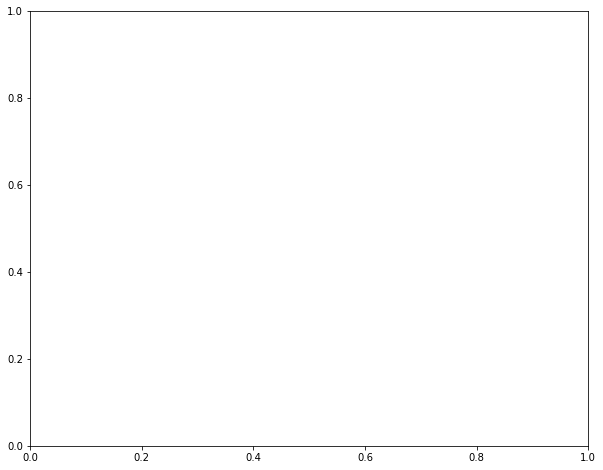

In [68]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(lgbm_clf, ax=ax, max_num_features=20)

In [ ]:
# eval_set 경우의 수 테스트